In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.Collecting the data

In [2]:
df=pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3037,06/04/2018,683,13,7.9,58,4.3,488,0.1,1.88,0.0,0.0,Spring,No Holiday,Yes
606,26/12/2017,120,6,-2.8,73,0.7,1906,-6.9,0.00,0.0,0.0,Winter,No Holiday,Yes
4200,25/05/2018,831,0,17.6,57,1.8,943,8.9,0.00,0.0,0.0,Spring,No Holiday,Yes
581,25/12/2017,32,5,-3.7,51,2.6,2000,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes
7764,20/10/2018,1407,12,17.7,33,2.2,1556,1.2,2.37,0.0,0.0,Autumn,No Holiday,Yes
7759,20/10/2018,427,7,7.0,82,0.5,867,4.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
6255,18/08/2018,1196,15,31.7,30,1.9,1943,11.9,2.23,0.0,0.0,Summer,No Holiday,Yes
7423,06/10/2018,5,7,16.5,97,2.3,364,16.0,0.00,9.5,0.0,Autumn,No Holiday,Yes
4632,12/06/2018,470,0,18.0,94,0.7,1906,17.0,0.00,1.0,0.0,Summer,No Holiday,Yes
5148,03/07/2018,944,12,30.1,64,1.2,2000,22.5,2.54,0.0,0.0,Summer,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [5]:
df['Snowfall (cm)'].value_counts()

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: Snowfall (cm), dtype: int64

In [6]:
#df=df.drop(["Rainfall(mm)","Snowfall (cm)"],axis=1)

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Hour column is notnormally distributed

In [ ]:

sns.distplot(df['Hour'])

Temperature colums is left skewed

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\397728486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature(°C)'])


<Axes: xlabel='Temperature(°C)', ylabel='Density'>

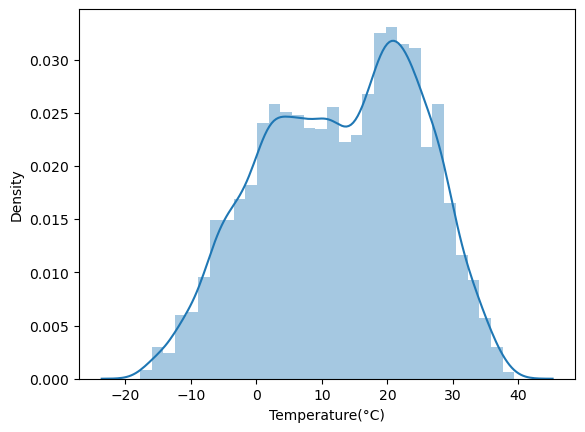

In [10]:
sns.distplot(df['Temperature(°C)'])

SCATTER PLOT BETWWEN TEMPERATURE AND RENTED BIKE COUNT  COLUMS INDICATES THAT THE 
"AS TEMP INCREASES NO. OF RENTED BIKE COUNT ALSO INCREADES"

<Axes: xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

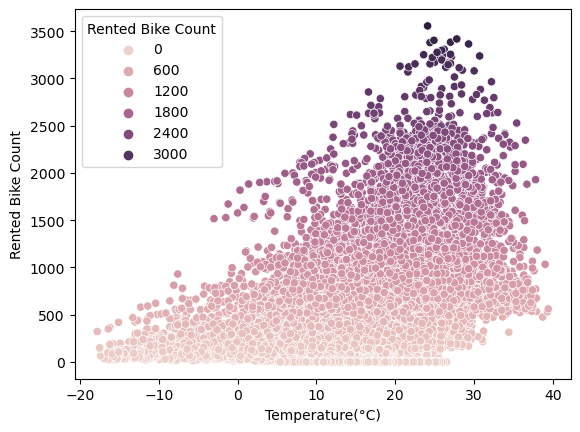

In [11]:
sns.scatterplot(x=df['Temperature(°C)'],y=df['Rented Bike Count'],hue=df['Rented Bike Count'])

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\2119872399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity(%)'])


<Axes: xlabel='Humidity(%)', ylabel='Density'>

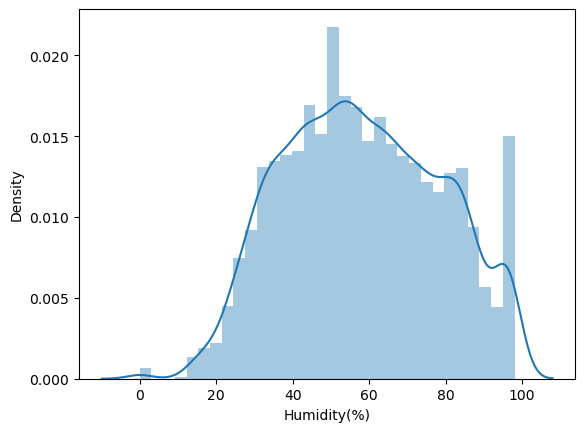

In [12]:
sns.distplot(df['Humidity(%)'])

<Axes: xlabel='Humidity(%)', ylabel='Rented Bike Count'>

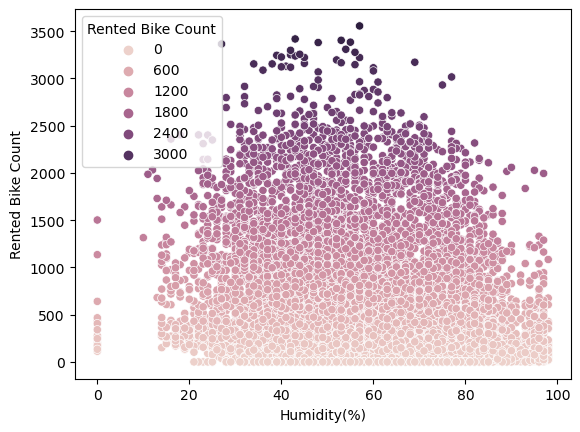

In [13]:
sns.scatterplot(x=df['Humidity(%)'],y=df['Rented Bike Count'],hue=df['Rented Bike Count'])

WIND SPEED COLUMN IS RIGHT SKWED SO WE NEED TO MAKE IT TO NORAMALLY DISTRIBUTED

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\230653468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Wind speed (m/s)'])


<Axes: xlabel='Wind speed (m/s)', ylabel='Density'>

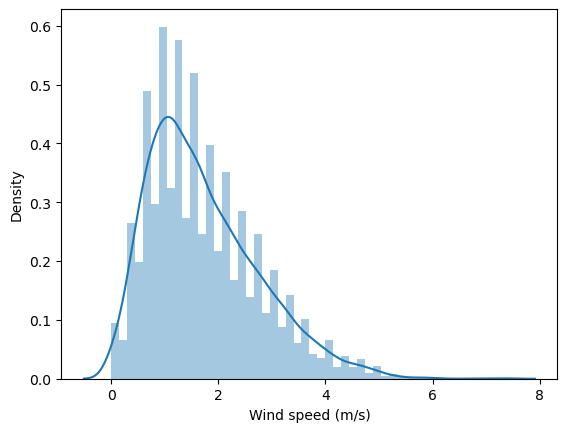

In [14]:
sns.distplot(df['Wind speed (m/s)'])

SCATTER PLOT BETWEEN WIND SPEED AND RENTED BIKE COUNTS SHOWS THAT THE AS WIND SPEED INCREASES BIKE COUNT DECREASES

<Axes: xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

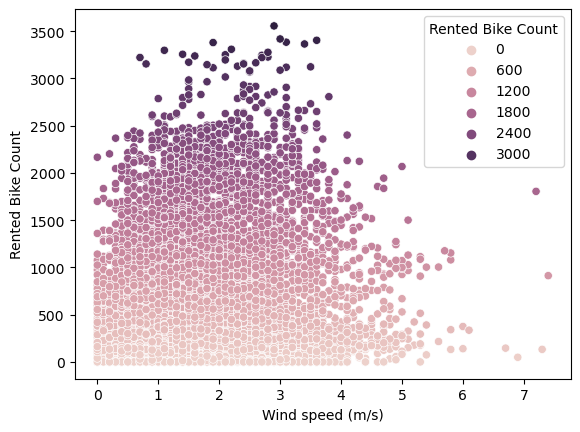

In [15]:
sns.scatterplot(x=df['Wind speed (m/s)'],y=df['Rented Bike Count'],hue=df['Rented Bike Count'])

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\943665200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Visibility (10m)'])


<Axes: xlabel='Visibility (10m)', ylabel='Density'>

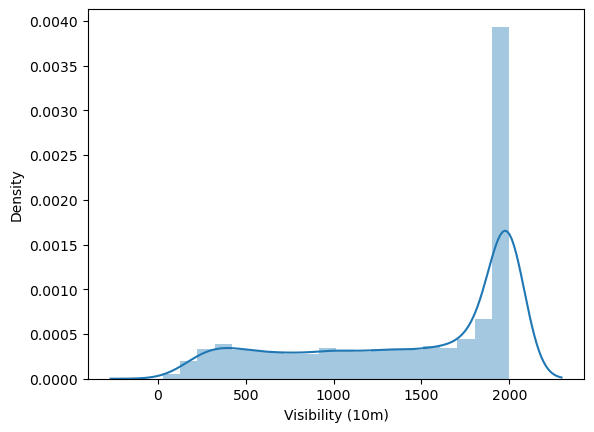

In [16]:
sns.distplot(df['Visibility (10m)'])

SCATTER PLOT BETWEEN VISIBILITY AND RENTED BIKE COUNTS INDICATEDS THAT AS VISIBILITY INCREASES  
NO. OF RENTED BIKE COUNT ALSO INCRESES

<Axes: xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

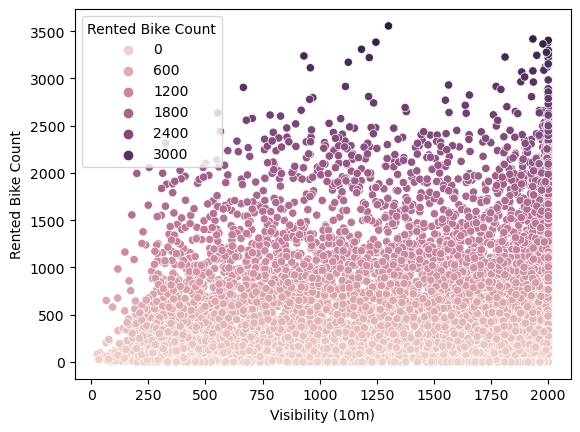

In [17]:
sns.scatterplot(x=df['Visibility (10m)'],y=df['Rented Bike Count'],hue=df['Rented Bike Count'])

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\3819346045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Dew point temperature(°C)"])


<Axes: xlabel='Dew point temperature(°C)', ylabel='Density'>

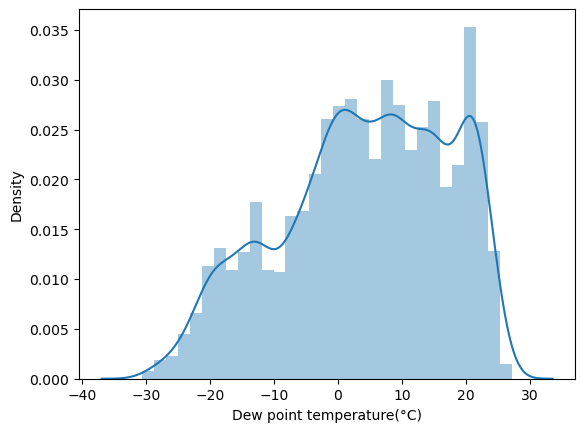

In [18]:
sns.distplot(df["Dew point temperature(°C)"])

In [19]:
df["Solar Radiation (MJ/m2)"].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

In [20]:
df['Date']=pd.to_datetime(df["Date"])

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\2310080536.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df["Date"])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

# CONVERT DATE COLUMN INTO DAY MONTH 

In [23]:
df['WeekDay']=df["Date"].dt.day_name()
df['Day']=df["Date"].dt.day
df["month"]=df['Date'].dt.month
df['year']=df['Date'].dt.year

df.drop('Date',axis=1,inplace=True)

In [24]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,30,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,30,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,30,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,30,11,2018


# EDA

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\2983587617.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month=df.groupby("month").sum().reset_index()


<Axes: xlabel='month', ylabel='Rented Bike Count'>

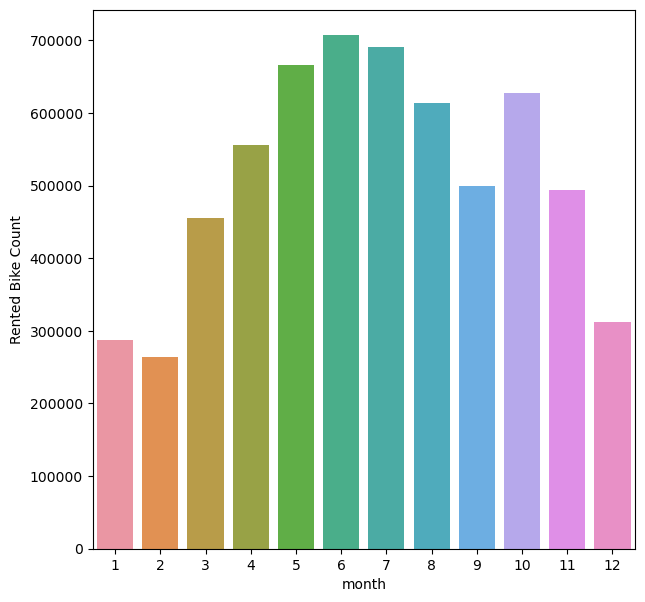

In [27]:
plt.figure(figsize=(7,7))
month=df.groupby("month").sum().reset_index()
sns.barplot(x="month",y="Rented Bike Count",data=month)

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\2888095621.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month=df.groupby("Day").sum().reset_index()


<Axes: xlabel='Day', ylabel='Rented Bike Count'>

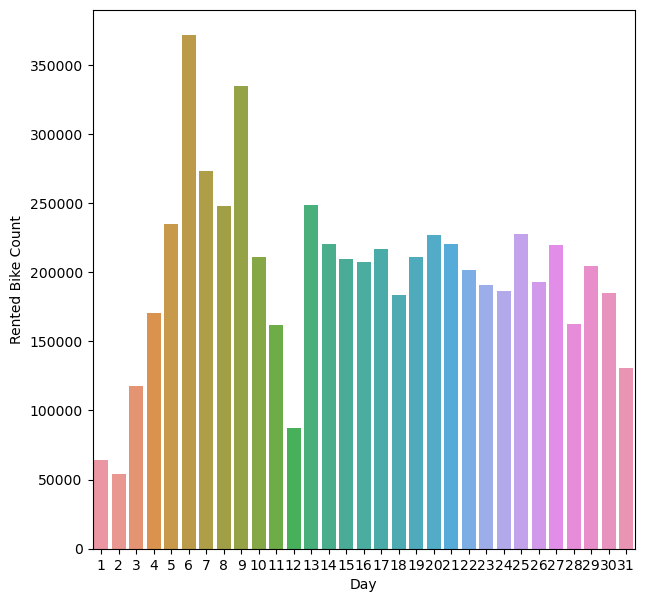

In [28]:
plt.figure(figsize=(7,7))
month=df.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y="Rented Bike Count",data=month)

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\211063624.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Hour=df.groupby("Hour").sum().reset_index()


<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

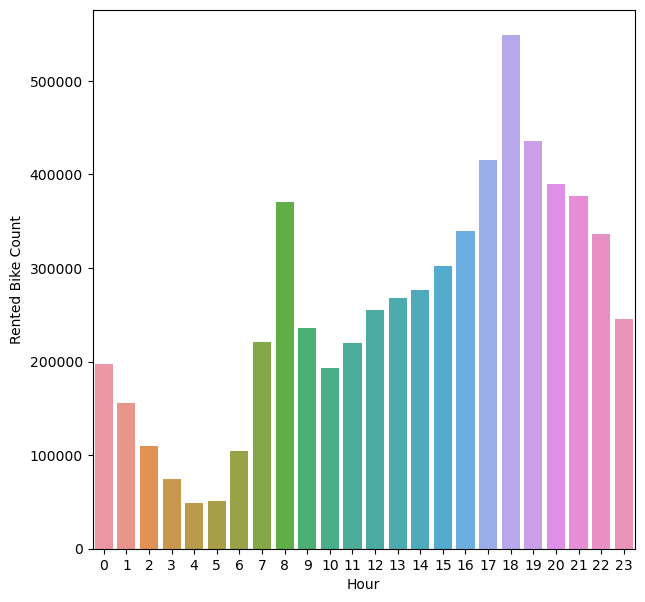

In [29]:
plt.figure(figsize=(7,7))
Hour=df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour",y="Rented Bike Count",data=Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

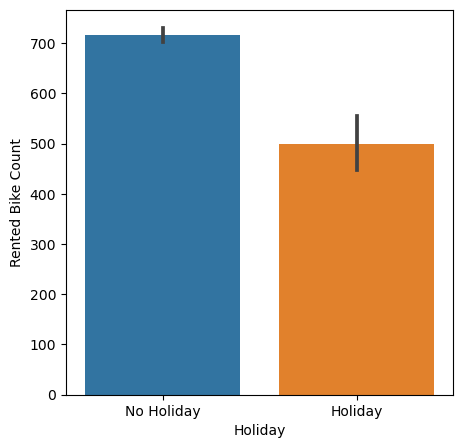

In [30]:
plt.figure(figsize=(5,5))
sns.barplot(x="Holiday",y="Rented Bike Count",data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

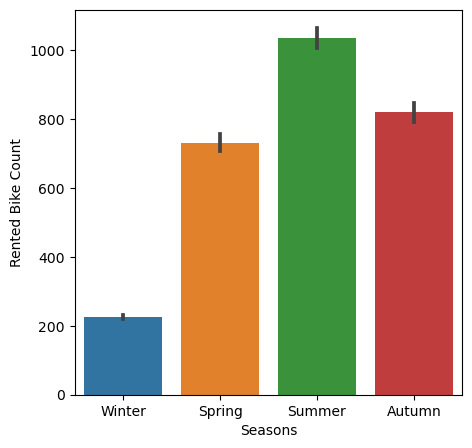

In [31]:
plt.figure(figsize=(5,5))
sns.barplot(x="Seasons",y="Rented Bike Count",data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

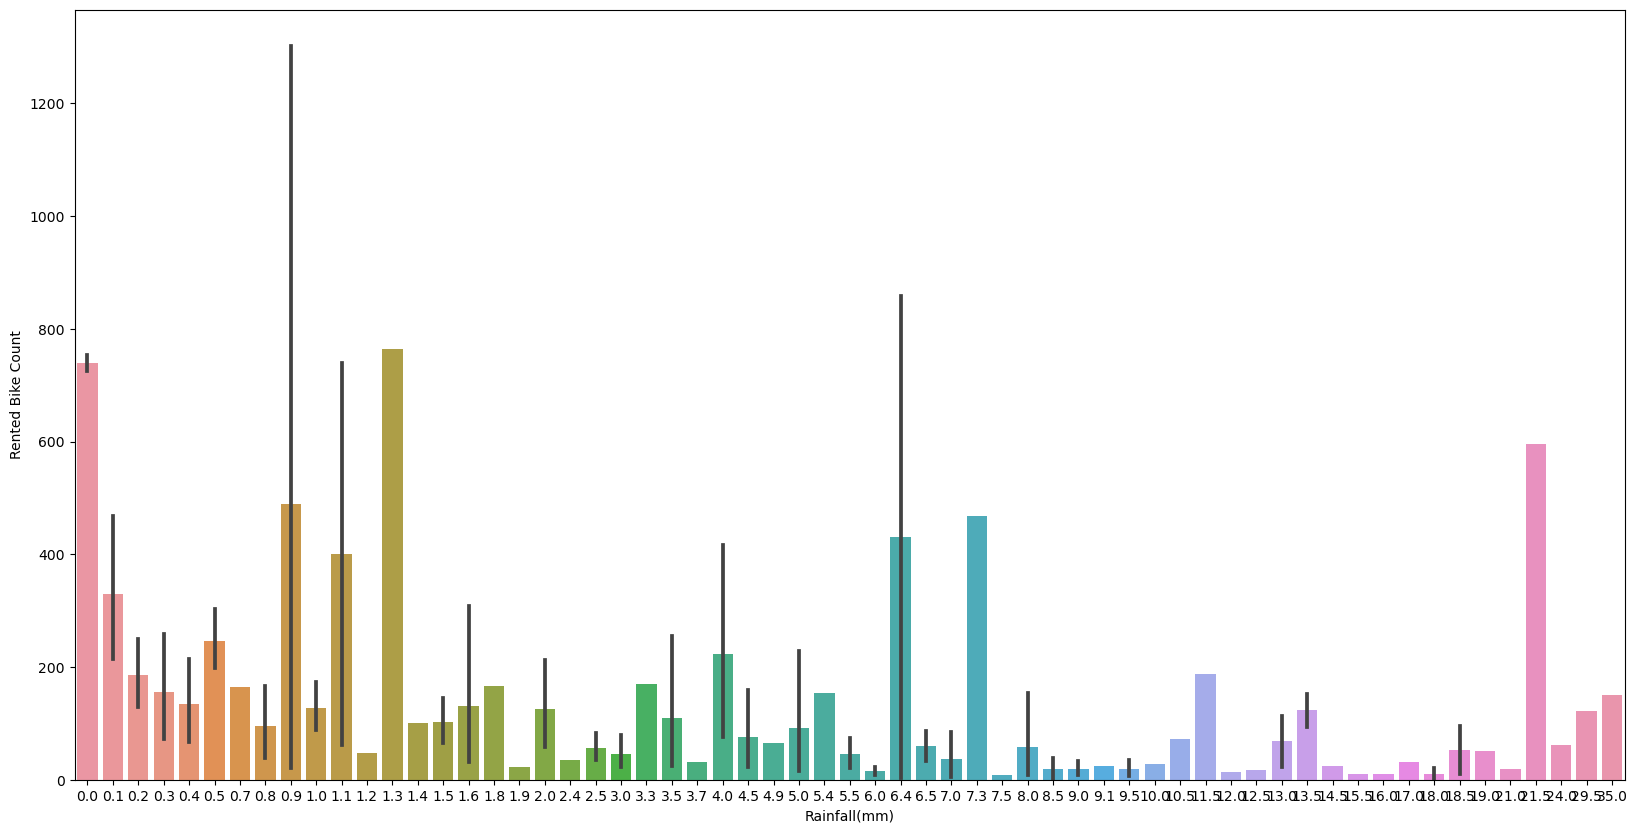

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x="Rainfall(mm)",y="Rented Bike Count",data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

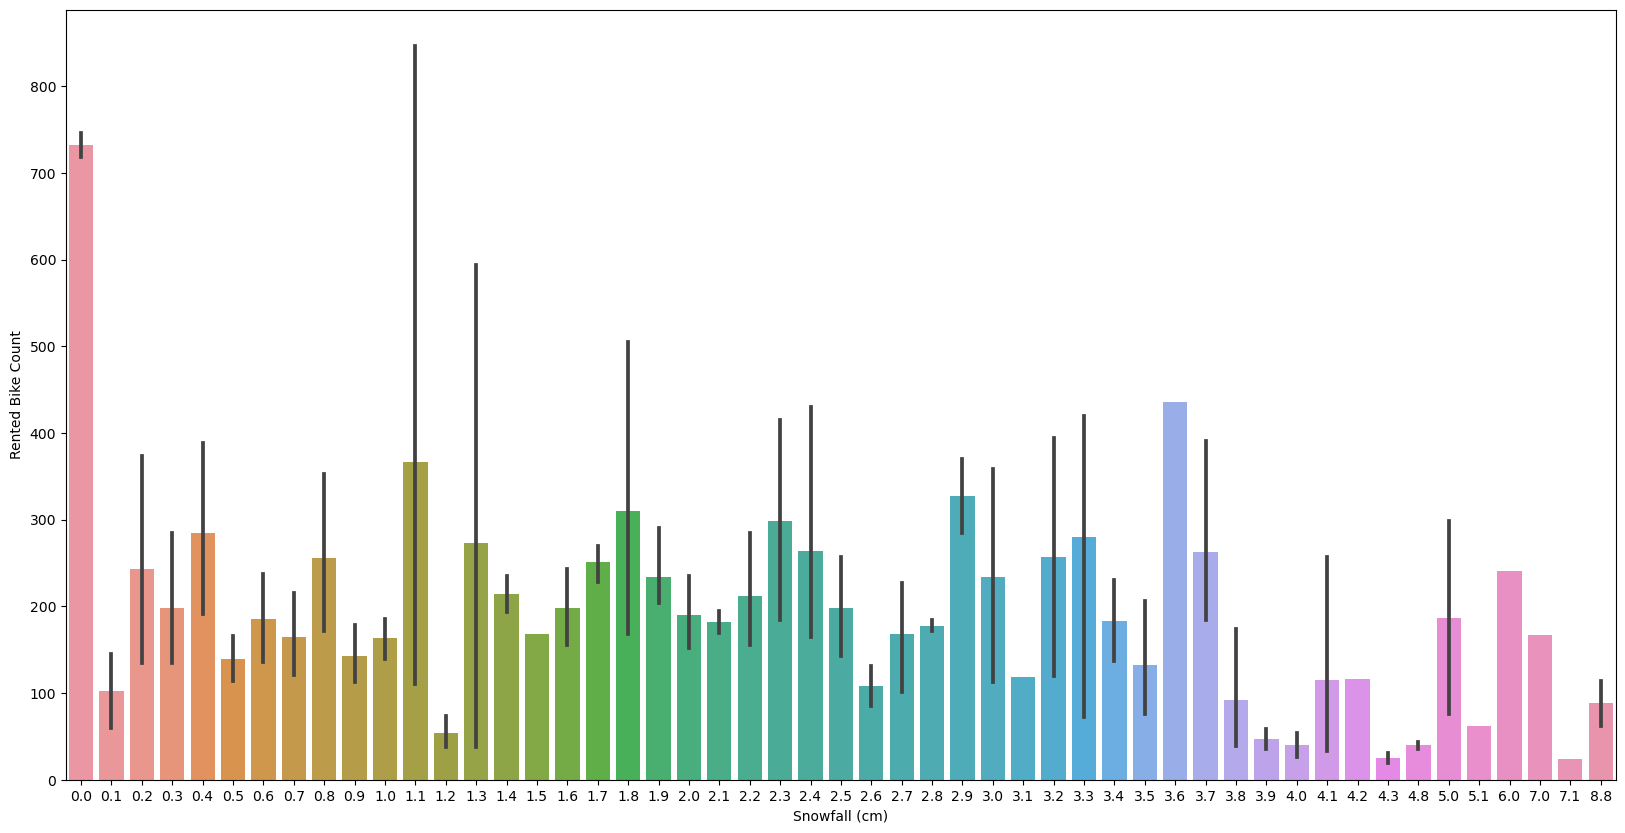

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x="Snowfall (cm)",y="Rented Bike Count",data=df)

"RENTED BIKE COUNT COLUMN IS HAVING RIGHT SKEWD DATA 

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\1468479156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rented Bike Count'])


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

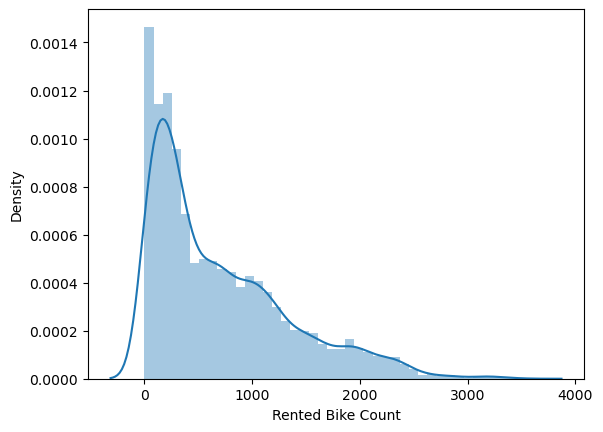

In [34]:
sns.distplot(df['Rented Bike Count'])

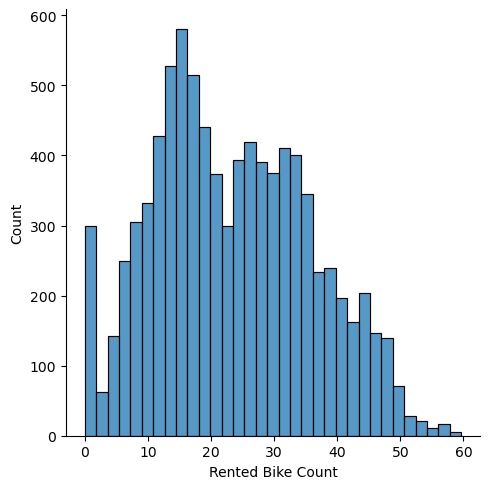

In [35]:
sns.displot(np.sqrt(df['Rented Bike Count']))

# skewed Data

In [37]:
df.skew().sort_values(ascending=True)

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\2280407189.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=True)


year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

<Axes: xlabel='Rainfall(mm)', ylabel='Count'>

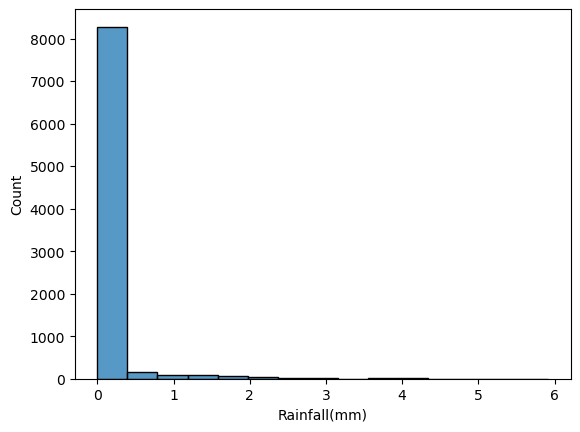

In [38]:
sns.histplot(np.sqrt(df['Rainfall(mm)']))

#OUTLIERS DECECTION(USING BOXPLOT,SACTTER[PLOT])

#REMOVE COLLINEARITY



# remove multicollinerity

#[HERE 'Dew point temperature(°C)' COLUMN WAS HAVING HIGH COLLINERITY WITH OHTER COLUMN SO WE DROP THIS COLUMN ]

C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\3553785953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True,cmap="coolwarm")


<Axes: >

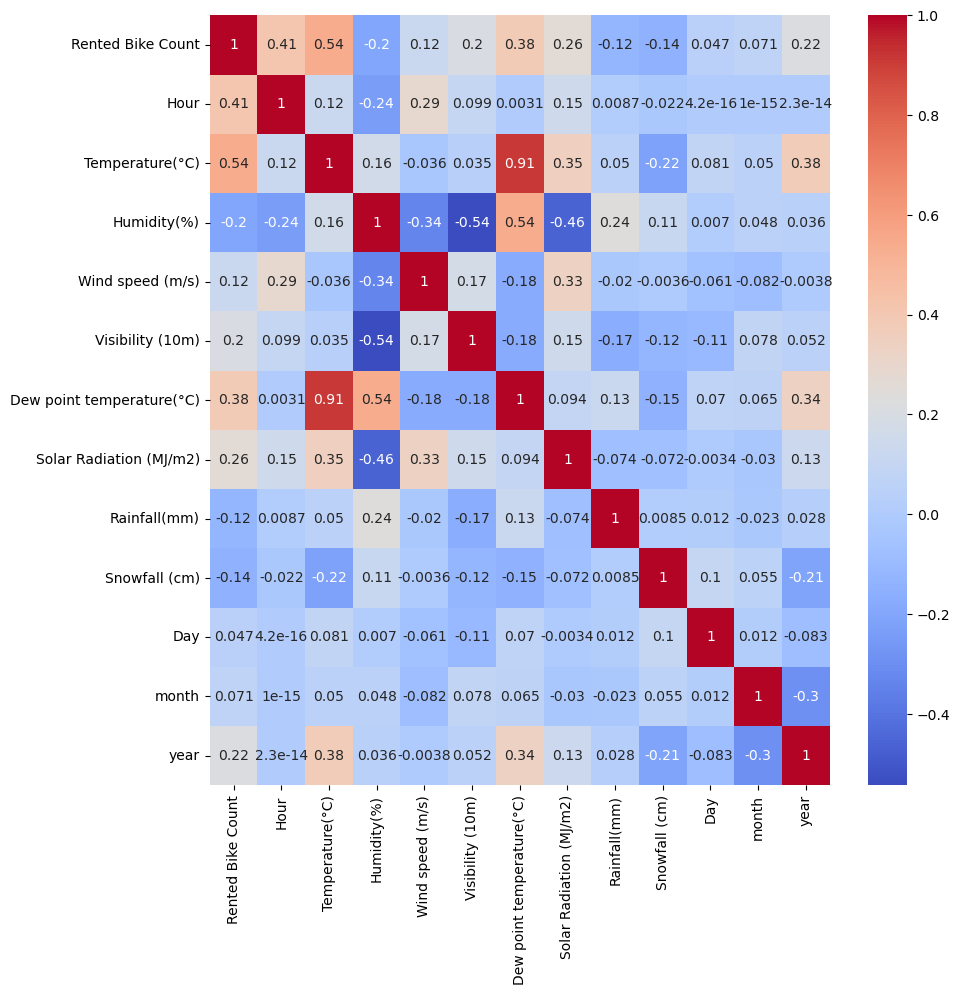

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot =True,cmap="coolwarm")

#drop Dew point temperature(°C) COLUMN AS IT SHOWS MULTICOLLINERITY

In [43]:
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

  #ENCODING
  
  [PERFORMING ONE HOT ENCODING]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  WeekDay                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  month                   

In [46]:
cat_features=["Seasons",'Holiday','Functioning Day',"WeekDay"]
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [47]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

FOR HOLIDAY AND FUNCTIONING DAY COLUMN 
:[WITH THE HELP OF MAP FUNCTION WE ASSIGN NO _HOLIDAY:0,HOLIDAY:1,NO:0,"YES:1"]

In [48]:
df["Holiday"]=df["Holiday"].map({'No Holiday':0,'Holiday':1})
df['Functioning Day']=df['Functioning Day'].map({'No':0 ,"Yes":1})

USING GET DUMMIES ONE HOT ENCODING

In [49]:
df_seasons=pd.get_dummies(df['Seasons'], drop_first=True)
df_weekday=pd.get_dummies(df['WeekDay'], drop_first=True)

In [50]:
df=pd.concat([df,df_seasons,df_weekday],axis=1)

In [51]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,year,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,...,2017,0,0,1,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,...,2017,0,0,1,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,...,2017,0,0,1,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,...,2017,0,0,1,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,...,2017,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,...,2018,0,0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,...,2018,0,0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,...,2018,0,0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,...,2018,0,0,0,0,0,0,0,0,0


In [52]:
df.drop(['Seasons','WeekDay'],axis=1,inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  month                    8760 non-null   int64  
 13  year                     8760 non-null   int64  
 14  Spring                  

In [54]:
df.shape

(8760, 23)

# CONVERSION OF DAT INTO X(TRAIN) AND Y(TARGET)

In [56]:
x=df.drop(["Rented Bike Count"],axis=1)
y=df["Rented Bike Count"]

# TRAIN TEST SPLIT

In [57]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=33)

In [58]:
x_train.shape,y_train.shape,x_test.shape



((7008, 22), (7008,), (1752, 22))

# SCALING THE DATA WHICH ONE IS RIGHT SKEWED OR LEST SKEWED

In [ ]:
df.skew().sort_values(ascending=True)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# MODEL TRAINING(LINEAR REGRESSION)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred=lr.predict(x_test)

In [66]:
y_pred

array([  77.36212859,  393.31647561,   64.27933264, ...,  860.59293309,
        721.47079767, 1245.94747675])

CALCULATING MSE ,MAE,R2_SCORE TO DO PREDICTION

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [68]:
mse=mean_squared_error(y_test,y_pred)

In [69]:
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [70]:
print(f"mse:{mse}")
print(f"mae,{mae}")
print(f"rmse,{rmse}")
print(f"r2,{r2}")



mse:184129.77962952896
mae,322.0478710130781
rmse,429.1034602861284
r2,0.5494295440129744


In [71]:
def get_metrices(y_test,y_pred,model_name):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    
    print(f" {model_name}:['mse':{mse},'rmse':{rmse},'mae':{mae},'r2':{r2}]")

In [72]:

get_metrices(y_test,y_pred, "linear regression")


 linear regression:['mse':184129.77962952896,'rmse':429.1034602861284,'mae':322.0478710130781,'r2':0.5494295440129744]


# TRAINING ON VARIOUS MODEL

In [73]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures


SUPPORT VECTOR REGRESSOR

In [74]:
from sklearn.svm import SVR

svr=SVR().fit(x_train,y_train)
y_pred_svr=svr.predict(x_test)

get_metrices(y_test,y_pred_svr,"SVR")




 SVR:['mse':317417.7166158933,'rmse':563.3983640514882,'mae':322.0478710130781,'r2':0.2232704258825522]


SVR IS HAVING R2 _SCORE AROUND 0.22

 DecisionTreeRegressor R2 _SCORE :0.78


In [75]:

from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_dtr=dtr.predict(x_test)

get_metrices(y_test,y_pred_dtr,"Decision tree")

 Decision tree:['mse':87630.42865296804,'rmse':296.02437172126224,'mae':322.0478710130781,'r2':0.7855660161221726]


RANDOM FOREST R2_SCORE:0.89

In [76]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor().fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)

get_metrices(y_test,y_pred_rfr,"RandomForest")

 RandomForest:['mse':41285.77122283105,'rmse':203.18900369565043,'mae':322.0478710130781,'r2':0.8989726224455667]


# XGBRegressor IS HAVING HIGHEST R2_SCORE:0.91
(ACCURACY AROUND 91%)

In [77]:
from xgboost import XGBRegressor

xgb=XGBRegressor().fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)


get_metrices(y_test,y_pred_xgb,"XGBoost")

 XGBoost:['mse':35508.36295614892,'rmse':188.4366284885954,'mae':322.0478710130781,'r2':0.9131100937572671]


# Visullise model prodiction
#[AS RANDOM FOREST "R2": SCORES IS HIGHEST THEREFORE IT IS SELECTED AS BEST MODEL]


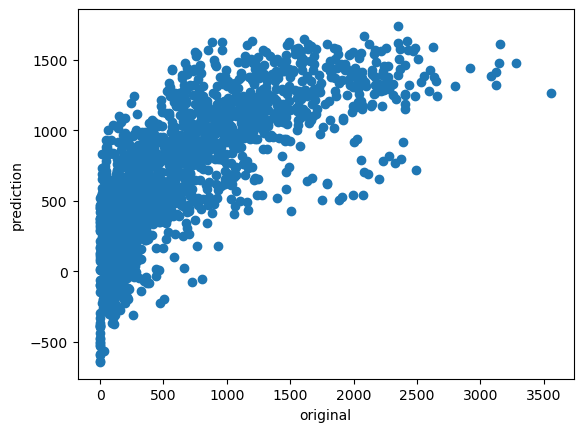

In [79]:
plt.scatter(y_test,y_pred)
plt.xlabel("original")
plt.ylabel("prediction")
plt.show()

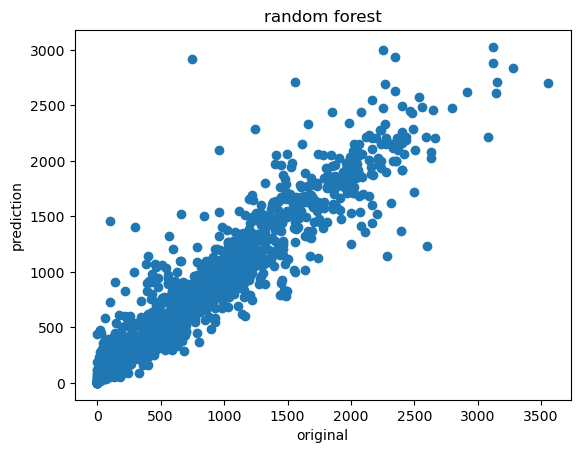

In [80]:
plt.scatter(y_test,y_pred_rfr)
plt.title("random forest")
plt.xlabel("original")
plt.ylabel("prediction")
plt.show()

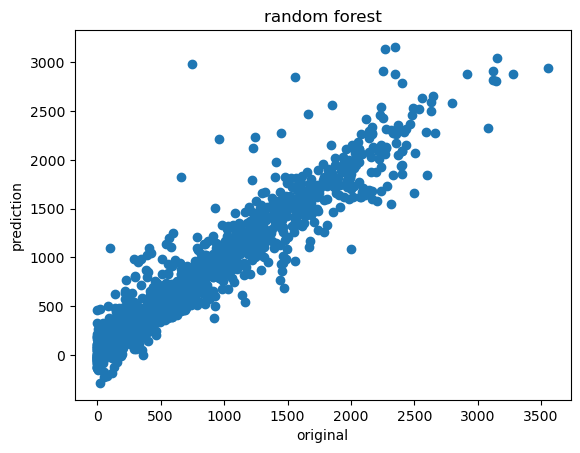

In [81]:
plt.scatter(y_test,y_pred_xgb)
plt.title("random forest")
plt.xlabel("original")
plt.ylabel("prediction")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\DATTATRAYA\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DATTATRAYA\AppData\Local\Temp\ipykernel_10004\312827233.py", line 6, in <module>
    "subsample":np.arrange(0.5,1.0,0.1),
                ^^^^^^^^^^
  File "C:\Users\DATTATRAYA\anaconda3\Lib\site-packages\numpy\__init__.py", line 347, in __getattr__
    raise AttributeError("module {!r} has no attribute "
AttributeError: module 'numpy' has no attribute 'arrange'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DATTATRAYA\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DATTATRAYA\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 13